<a href="https://colab.research.google.com/github/NSCC-ITC-Winter2024-DBAS5125-700-MCr/assignment-2-pdushie/blob/main/Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 Notebook

## Install YData profiling tool

In [ ]:

%pip install ydata-profiling

## Install and upgrade plotly

In [ ]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import required libraries/packages


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from google.colab import drive
drive.mount('/content/gdrive') # Due to the large size of the dataset, had to upload it to Google drive

Mounted at /content/gdrive


## Variable to hold Google drive link to the dataset
#### Dataset Source: https://www.kaggle.com/datasets/mexwell/us-air-pollution

In [ ]:
URL = '/content/gdrive/MyDrive/uspollution_pollution_us_2000_2016.csv'

## Create a Pandas Dataframe

In [ ]:
df = pd.read_csv(URL)

## View the first 5 records in the dataset

In [ ]:
df.head()

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...  Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

## Print some information about the Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

## Take out the "Unnamed: 0" column

In [ ]:
df = df.drop('Unnamed: 0', axis=1) # Axis of 1 refers to column and axis of 0 refers to row

## View records count in the dataset

In [ ]:
df.count()

State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI               873754
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI                873338
dtype: int64

## View the number of NULL values in the dataset

In [ ]:
df.isnull().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

## YData Profiling

In [ ]:
profile = ProfileReport(df, title='Profile Report for Air Pollution Dataset',
                        explorative=True,minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Handling NULL values
>#### I will set all null values to 0

In [ ]:
df[['SO2 AQI','CO AQI']] = df[['SO2 AQI','CO AQI']].fillna(0)
df.head()

State Code  County Code  Site Num                                  Address  \
0           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
1           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
2           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
3           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
4           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   

     State    County     City  Date Local          NO2 Units   NO2 Mean  ...  \
0  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
1  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
2  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
3  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
4  Arizona  Maricopa  Phoenix  2000-01-02  Parts per billion  22.958333  ...   

           SO2 Units  SO2 Mean  SO2 1st Max Value SO2 1st Max Hour  SO2 AQI  \
0  Parts per billion  3.000000                9.0               21     13.0   
1  Parts per billion  3.000000                9.0               21     13.0   
2  Parts per billion  2.975000                6.6               23      0.0   
3  Parts per billion  2.975000                6.6               23      0.0   
4  Parts per billion  1.958333                3.0               22      4.0   

            CO Units   CO Mean  CO 1st Max Value CO 1st Max Hour  CO AQI  
0  Parts per million  1.145833               4.2              21     0.0  
1  Parts per million  0.878947               2.2              23    25.0  
2  Parts per million  1.145833               4.2              21     0.0  
3  Parts per million  0.878947               2.2              23    25.0  
4  Parts per million  0.850000               1.6              23     0.0  

[5 rows x 28 columns]

## Confirm all NULL fields have been taken care of

In [ ]:
df.isna().sum()

State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

## Create a new column called "Overall AQI"
>#### After calculating the AQI for each pollutant, identify the pollutant with the highest AQI value. This pollutant is considered the dominant pollutant and its value becomes the overall AQI

In [ ]:
df['Overall AQI'] = df[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].max(axis=1)
df.head()

State Code  County Code  Site Num                                  Address  \
0           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
1           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
2           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
3           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
4           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   

     State    County     City  Date Local          NO2 Units   NO2 Mean  ...  \
0  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
1  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
2  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
3  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
4  Arizona  Maricopa  Phoenix  2000-01-02  Parts per billion  22.958333  ...   

   SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units  \
0  3.000000                9.0                21    13.0  Parts per million   
1  3.000000                9.0                21    13.0  Parts per million   
2  2.975000                6.6                23     0.0  Parts per million   
3  2.975000                6.6                23     0.0  Parts per million   
4  1.958333                3.0                22     4.0  Parts per million   

    CO Mean  CO 1st Max Value  CO 1st Max Hour CO AQI  Overall AQI  
0  1.145833               4.2               21    0.0         46.0  
1  0.878947               2.2               23   25.0         46.0  
2  1.145833               4.2               21    0.0         46.0  
3  0.878947               2.2               23   25.0         46.0  
4  0.850000               1.6               23    0.0         34.0  

[5 rows x 29 columns]

## AQI Chart
>#### Source of image: https://www.airnow.gov/aqi/aqi-basics/

![](https://drive.google.com/uc?export=view&id=14qrr4d2JnJE4q_c00yL-gHQno04AM1sf)

## Data visualization with Plotly
>#### Plot of Mean O3 vs Mean SO2

In [ ]:

# Plotly histogram
fig = px.scatter(
   df.sample(n=385),
   x='Date Local',
   y='Overall AQI',
   title = "Overall AQI for different States",
   color = 'State',
   width = 600,
   height = 600,
)

fig.show()

## Data Visualization with Seaborn
> #### Distribution plot for Mean O3

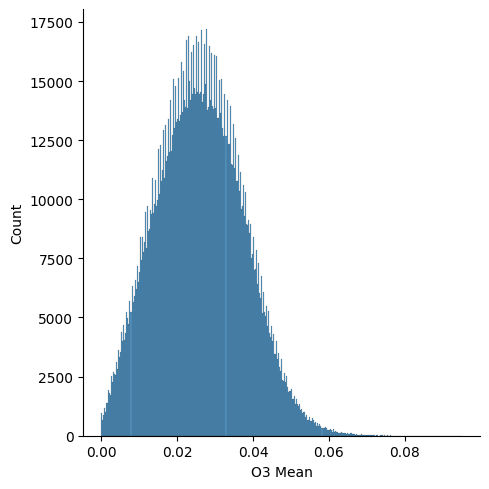

In [ ]:
sns.displot(df['O3 Mean'])

> #### Box Plot for Overall AQI

<Axes: xlabel='Overall AQI'>

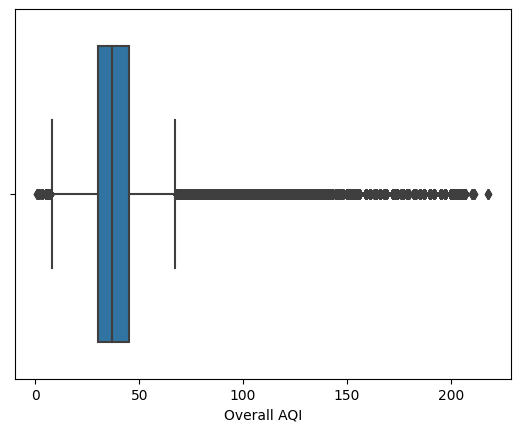

In [ ]:
sns.boxplot(x = df['Overall AQI'])

## Heatmap plot for US Air pollution Dataset

[Text(0.5, 1.0, 'US Air Pollution')]

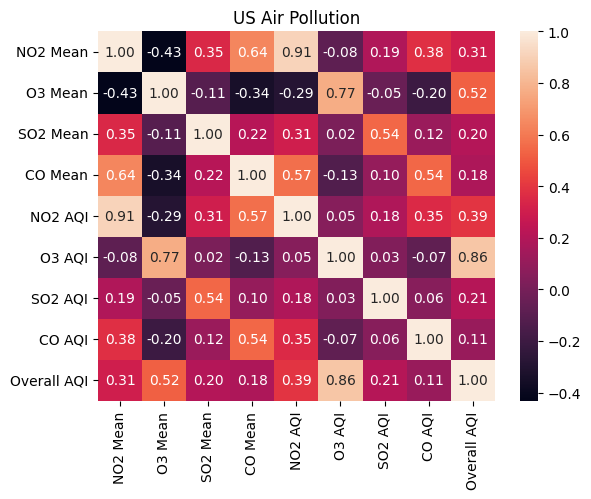

In [ ]:
sns.heatmap(df[['NO2 Mean','O3 Mean','SO2 Mean','CO Mean','NO2 AQI','O3 AQI','SO2 AQI','CO AQI','Overall AQI']].corr(),annot=True,fmt=".2f").set(title="US Air Pollution")

## Define the features we are interested in

In [ ]:
df = df[['NO2 Mean','O3 Mean','SO2 Mean','CO Mean','Overall AQI']]
df.head()

NO2 Mean   O3 Mean  SO2 Mean   CO Mean  Overall AQI
0  19.041667  0.022500  3.000000  1.145833         46.0
1  19.041667  0.022500  3.000000  0.878947         46.0
2  19.041667  0.022500  2.975000  1.145833         46.0
3  19.041667  0.022500  2.975000  0.878947         46.0
4  22.958333  0.013375  1.958333  0.850000         34.0

# Pick a random subset from the dataset

In [ ]:
# Define your features(x) and target(y)
X = df.drop(['Overall AQI'], axis=1)
y = df['Overall AQI']

# Choosing a random subset fom the dataset
# Choosing sample size: https://www.calculator.net/sample-size-calculator.html
X = X.sample(n=13468)
y = y.loc[X.index]

## Print out the number of samples

In [ ]:
print("Count of features:\n",X.count())
print("*"*23)
print("Count of target :",y.count())

Count of features:
 NO2 Mean    13468
O3 Mean     13468
SO2 Mean    13468
CO Mean     13468
dtype: int64
***********************
Count of target : 13468


## Define Training and Testing Data

In [ ]:
y = df['Overall AQI']
X = df.drop(['Overall AQI'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                    random_state=None,
                                                    shuffle=True, stratify=y)

## Using RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5)


## Fit the model on the training data

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

## Prediction score on the training data

In [ ]:
rf.score(X_train,y_train)
# Without preprocessing through pipeline, accuracy is 0.9848393352690314

0.9848393352690314

## Prediction score on the test data

In [ ]:
rf.score(X_test,y_test)
# Without preprocessing through pipeline, accuracy is 0.9392427970542258

0.9392427970542258

## Doing an actual prediction using the trained model

In [ ]:
print("Predicted AQI: ",rf.predict([[19.041667,0.0225 , 3, 1.145833]]).item())

Predicted AQI:  44.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



## Create Pipelines

In [ ]:
pipelines = {
   "StandardScaler_DecisionTreeRegressor": Pipeline([
       ("scaler", StandardScaler()),
       ("classifier", DecisionTreeRegressor())
   ]),
   "RobustScaler_DecisionTreeRegressor": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", DecisionTreeRegressor())
   ]),
   "StandardScaler_RandomForestRegressor": Pipeline([
       ("scaler", StandardScaler()),
       ("classifier", RandomForestRegressor(n_estimators=5))
   ]),
   "RobustScaler_RandomForestRegressor": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", RandomForestRegressor(n_estimators=5))
   ]),
   "RobustScaler_XGBoostRegressor": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", xg.XGBRegressor())
   ])
}

In [ ]:
pipelines.get("StandardScaler_RandomForestRegressor").fit(X_train,y_train).score(X_test,y_test)

0.9390612062787983

In [ ]:
pipelines.get("RobustScaler_RandomForestRegressor").fit(X_train,y_train).score(X_test,y_test)
# Using RobustScaler_RandomForestRegressor pipeline slightly increases the
# prediction accuracy to 0.9410110817874354

0.9383225986345151

In [ ]:
pipelines.get("StandardScaler_DecisionTreeRegressor").fit(X_train,y_train).score(X_test,y_test)
# Using StandardScaler_DecisionTreeRegressor gives a slight increase in
# prediction accuracy

0.943707577370023

In [ ]:
pipelines.get("RobustScaler_DecisionTreeRegressor").fit(X_train,y_train).score(X_test,y_test)
# Using StandardScaler_DecisionTreeRegressor gives a slight increase in
# prediction accuracy

0.9432604514690118

In [ ]:
pipelines.get("RobustScaler_XGBoostRegressor").fit(X_train,y_train).score(X_test,y_test)
# XGBoost does not perform well compared to RandomForest and Decision Tree Regressor

0.7468489391512745